# 제주특별자치도 제주도장소(POI)
데이터 링크 : https://www.data.go.kr/data/15004770/fileData.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/일일 데이터 분석

Mounted at /content/drive
/content/drive/MyDrive/일일 데이터 분석


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./제주특별자치도 제주도장소(POI)데이터.csv',encoding='cp949')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74439 entries, 0 to 74438
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   장소 POI에 대한 ID 구분 번호 체계   74439 non-null  int64  
 1   위치좌표 X축값                 74439 non-null  float64
 2   위치좌표 Y축값                 74439 non-null  float64
 3   구분                       74439 non-null  object 
 4   장소명                      74439 non-null  object 
 5   소재지                      74439 non-null  object 
 6   데이터기준일자                  74439 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 4.0+ MB


In [4]:
data.head()

,장소 POI에 대한 ID 구분 번호 체계,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,데이터기준일자
0,3,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015-12-31
1,4,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015-12-31
2,5,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015-12-31
3,6,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015-12-31
4,7,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015-12-31


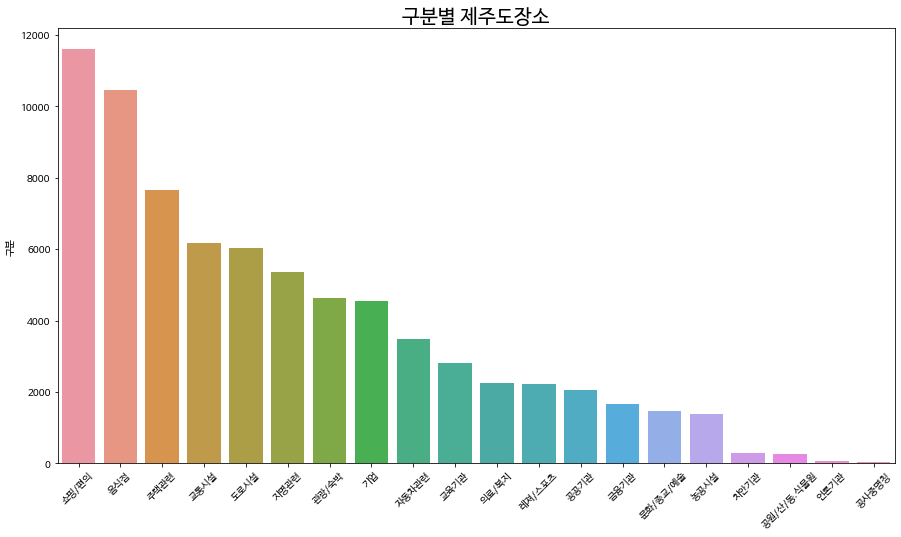

In [7]:
plt.figure(figsize=(15,8))
sns.barplot(x=data['구분'].value_counts().index, y = data['구분'].value_counts())
plt.xticks(rotation=45)
plt.title('구분별 제주도장소',size=20)
plt.show()

In [42]:
import folium as g

# color_list = ['red','blue','green','orange','drakred','lightred','beige','violet','darkblue','darkgreen','cadeblue','darkpurple','white','pink','lightblue','lightgreen','gray','black','lightgray','darkviolet']

def make_gmap(df,temp):
  plot_df = df[df['구분'] == temp][:100]
  center_longitude, center_latitude = plot_df['위치좌표 Y축값 '].mean(), plot_df['위치좌표 X축값 '].mean()

  g_map = g.Map(location=[center_longitude,center_latitude],
                tiles='Stamen Terrain',
                zoom_start=12)

  for num, (lon, lat) in enumerate(zip(plot_df['위치좌표 Y축값 '],plot_df['위치좌표 X축값 '])):
      marker = g.Marker([lon,lat],
                          icon= g.Icon(color='red')).add_to(g_map)
  
  return g_map

In [43]:
shopping = make_gmap(data,'쇼핑/편의')

In [44]:
shopping